In [1]:
# latex rendering
import matplotlib.pyplot as plt 


# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

import plot_functions as p_func
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

c_scheme = p_func.c_scheme_02()

In [2]:
# read files

fname1 = "Data/setup1/aba1.csv"
csv_data_1 = pd.read_csv(fname1, sep=",")

fname2 = "Data/setup1/aba2.csv"
csv_data_2 = pd.read_csv(fname2, sep=",")

fname3 = "Data/setup1/aba3.csv"
csv_data_3 = pd.read_csv(fname3, sep=",")

# selection doppler broadened

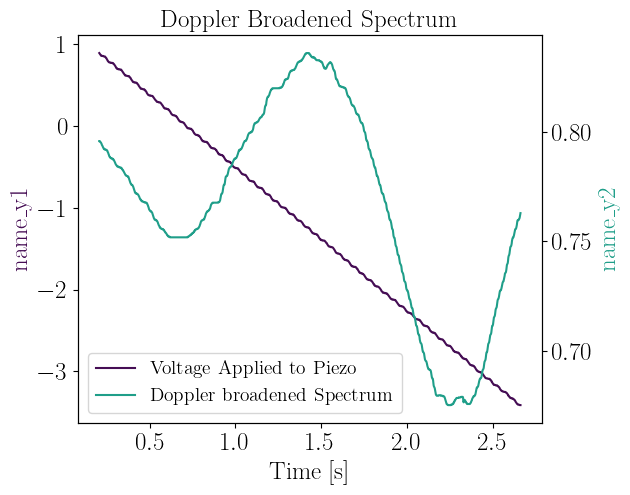

In [3]:
von1, zu1 = 170, -340

[von1,zu1]

plot_1_LEFTAXIS = [
    [csv_data_1["second"][von1:zu1], csv_data_1["Volt1"][von1:zu1], "Voltage Applied to Piezo ", c_scheme[0], "-", ""],
]

plot_1_RIGHTAXIS = [
    [csv_data_1["second"][von1:zu1], csv_data_1["Volt2"][von1:zu1], "Doppler broadened Spectrum", c_scheme[5], "-", ""],
]

p_func.plot_with_two_axes_with_N_curves_with_VERTICAL_lines(plot_1_LEFTAXIS, plot_1_RIGHTAXIS, name_x="Time [s]", name_y1="name_y1", name_y2="name_y2", col_ax1 = c_scheme[0], col_ax2= c_scheme[5], plot_title="Doppler Broadened Spectrum", filename_to_save="nopdf", marker_size="5", font_size=18, legend_size=14, legend_local="best", vlines=None, x_ticks=True)

# Selection Doppler free

True


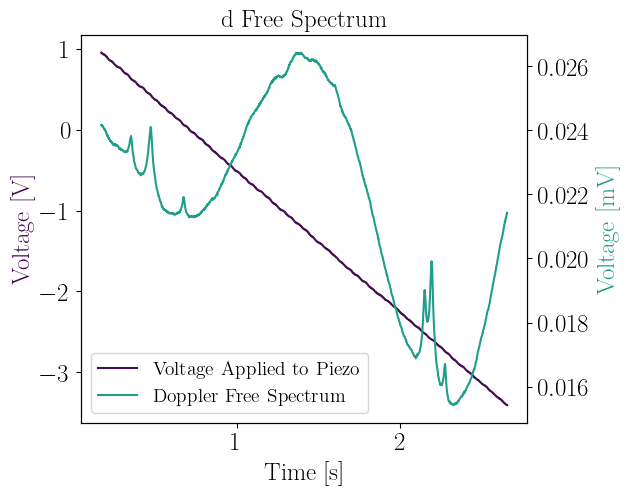

In [4]:
von2, zu2 = 120, -460

plot_2_LEFTAXIS = [
    [csv_data_2["second"][von2:zu2], csv_data_2["Volt2"][von2:zu2], "Voltage Applied to Piezo ", c_scheme[0], "-", ""],
]

plot_2_RIGHTAXIS = [
        [csv_data_2["second"][von2:zu2], csv_data_2["Volt1"][von2:zu2], "Doppler Free Spectrum", c_scheme[5], "-", ""],
]

p_func.plot_with_two_axes_with_N_curves_with_VERTICAL_lines(plot_2_LEFTAXIS, plot_2_RIGHTAXIS, name_x="Time [s]", name_y1="Voltage [V]", name_y2="Voltage [mV]", col_ax1 = c_scheme[0], col_ax2= c_scheme[5], plot_title="d Free Spectrum", filename_to_save="nopdf", marker_size="5", font_size=18, legend_size=14, legend_local="lower left", vlines=None, x_ticks=True, invert_x = True)

# normalize

In [5]:
# normalize

array_DB = csv_data_1["Volt2"][von1:zu1]
normalized_DB = (array_DB - array_DB.min()) / (array_DB.max() - array_DB.min())



array_DF = csv_data_2["Volt1"][von2:zu2]
normalized_DF = (array_DF - array_DF.min()) / (array_DF.max() - array_DF.min())
normalized_x_DB = csv_data_2["second"][von2:zu2]


array_DB.min()

0.675127

# Comparison

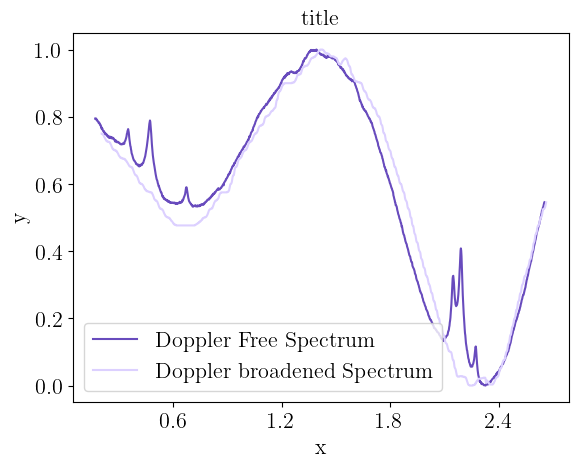

In [ ]:
cols3 = ["#DCD0FF", "#BFAFEF", "#A28EDE", "#856DCE", "# "] # nice

plot_normalized = [
    [csv_data_2["second"][von2:zu2], normalized_DF, "Doppler Free Spectrum", cols3[4], "-", ""],

    [csv_data_1["second"][von1:zu1], normalized_DB, "Doppler broadened Spectrum", cols3[0], "-", ""],

]


p_func.plot_with_one_axis_with_vertical_lines(plot_normalized, name_x="x", name_y="y", plot_title="title", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, vlines=None, y_lim = None, invert_xaxis = False) # [data_x, data_y, label, colorr, line_style, marker_type], [[x_val, color, linestyle], ...]

# Peaks

Index: 224, x = 0.352, y = 0.763
Index: 293, x = 0.47275, y = 0.789
Index: 408, x = 0.674, y = 0.590
Index: 819, x = 1.39325, y = 1.000
Index: 1251, x = 2.14925, y = 0.327
Index: 1275, x = 2.19125, y = 0.408
Index: 1322, x = 2.2735, y = 0.116
[[0.352, 'gray', '--'], [0.47275, 'gray', '--'], [0.674, 'gray', '--'], [2.14925, 'gray', '--'], [2.19125, 'gray', '--'], [2.2735, 'gray', '--']]


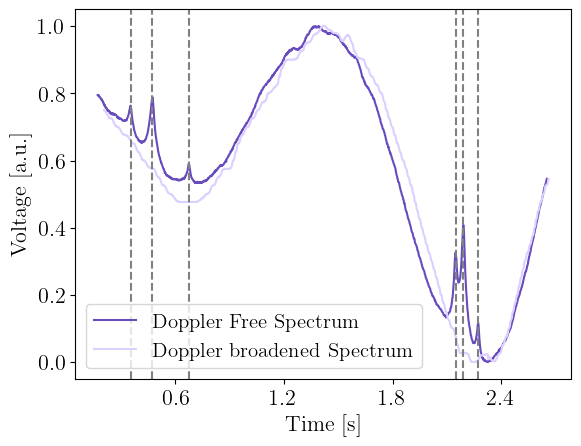

In [50]:
import numpy as np
from scipy.signal import find_peaks

# Convert to numpy arrays for peak finding
y_data = normalized_DF.values
x_data = normalized_x_DB.values

# Find peaks — adjust parameters as needed
peaks, _ = find_peaks(y_data, prominence=0.01)

# Get corresponding x and y values
peak_xs = x_data[peaks]
peak_ys = y_data[peaks]

# Get corresponding Pandas index (use .iloc to preserve original index values)
peak_indices = normalized_DF.iloc[peaks].index

vlines = []

# Print index, x, and y
for idx, x, y in zip(peak_indices, peak_xs, peak_ys):
    print(f"Index: {idx}, x = {x}, y = {y:.3f}")
    if x != 1.39325:
        vlines.append([x, "gray", "--"])


print(vlines)

p_func.plot_with_one_axis_with_vertical_lines(plot_normalized, name_x="Time [s]", name_y="Voltage [a.u.]", plot_title="", filename_to_save="../Figures/results_ABA", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=15, x_ticks_limit=5, vlines=vlines, y_lim = None, invert_xaxis = False) # [data_x, data_y, label, colorr, line_style, marker_type], [[x_val, color, linestyle], ...]
